In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1515921474464403457  1515576397661556737  2022-04-18 05:13:38 UTC   
1  1515921473097060355  1515920085138898944  2022-04-18 05:13:38 UTC   
2  1515921471494885382  1512166226814025730  2022-04-18 05:13:37 UTC   
3  1515921466402897922  1515921466402897922  2022-04-18 05:13:36 UTC   
4  1515921465216212994  1515921465216212994  2022-04-18 05:13:36 UTC   

         date      time  timezone              user_id         username  \
0  2022-04-18  05:13:38         0  1243169857857781760  janismelderis74   
1  2022-04-18  05:13:38         0  1462330296314048515  tylermcanally08   
2  2022-04-18  05:13:37         0  1011810506913533953      adamtarver6   
3  2022-04-18  05:13:36         0           3421280825    simonishihara   
4  2022-04-18  05:13:36         0           1187592500      zenjidesign   

             name place  ... geo source user_rt_id user_rt retweet_id  \
0  Jānis Melderis   NaN  ... NaN    NaN    

In [2]:
data = data[["username", "tweet", "language"]]
data.isnull().sum()
data["language"].value_counts()

en     8934
pt      224
und     215
it      142
ja      106
in       95
es       44
ru       37
hi       26
zh       24
tl       17
et       16
ca       12
nl       12
fi       10
ur        8
fr        8
ro        7
cs        7
de        6
tr        6
ko        5
el        5
ar        5
th        4
uk        4
pl        3
ta        3
lv        2
da        2
no        2
sl        2
te        2
lt        2
kn        1
bn        1
cy        1
fa        1
Name: language, dtype: int64

In [3]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skrPlays\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


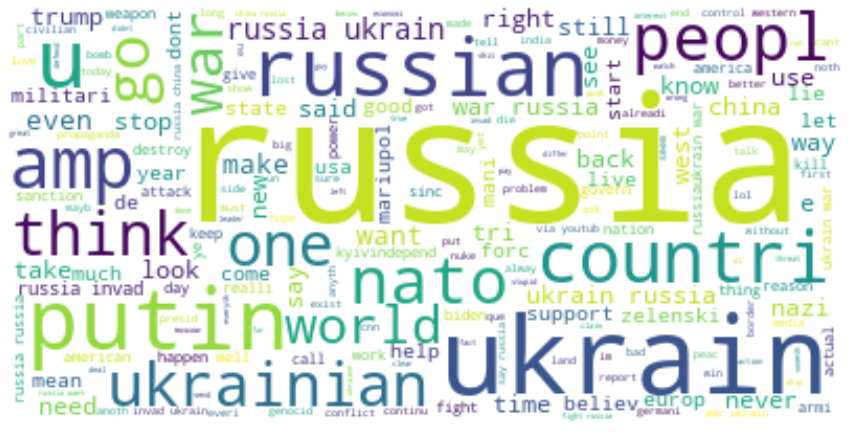

In [4]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\skrPlays\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  akorybko mcfaul msimonyan forget take medicin ...     0.066     0.532   
1         mcfaul doubt russia oper ukrain “special”…     0.000     0.333   
2   came saw troll russia think your realli good ...     0.370     0.000   
3  mariupol relentless attack russia   via youtub...     0.066     0.169   
4   cyprus russian connect everywher russian tour...     0.058     0.000   

   Neutral  
0    0.401  
1    0.667  
2    0.630  
3    0.765  
4    0.942  


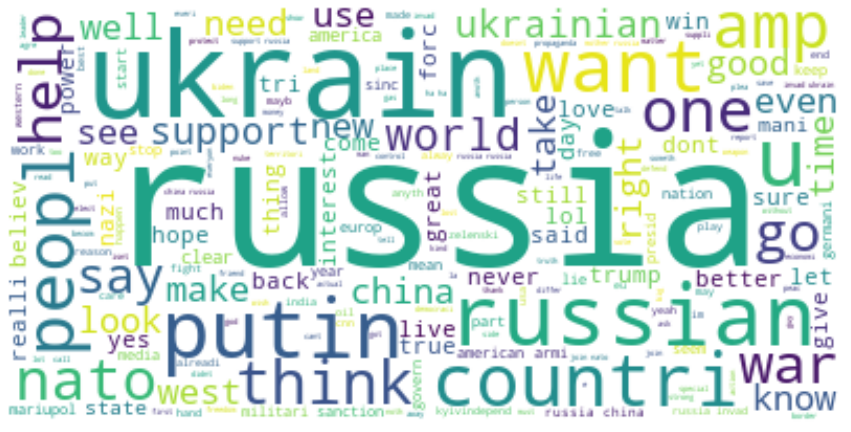

In [6]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

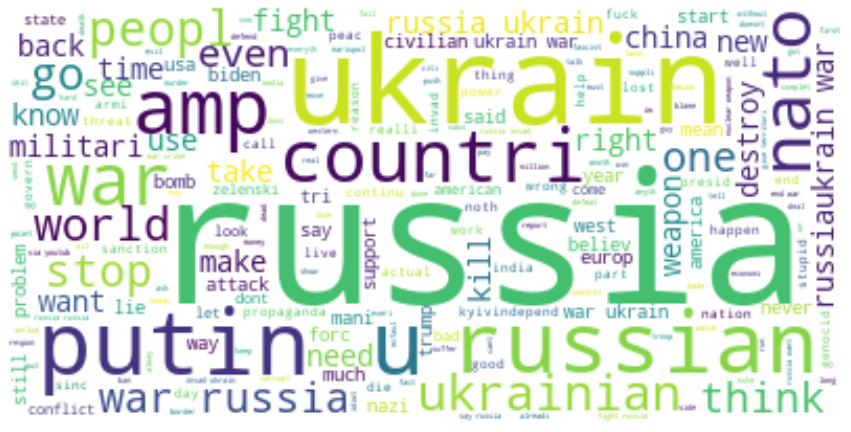

In [7]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
(data['Negative'] > 0.4).value_counts()

False    9225
True      776
Name: Negative, dtype: int64

In [11]:
data.describe()

,Positive,Negative,Neutral
count,10001.000000,10001.000000,10001.000000
mean,0.089451,0.146333,0.763917
std,0.120584,0.158110,0.186522
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.627000
50%,0.000000,0.116000,0.761000
75%,0.159000,0.254000,1.000000
max,0.836000,0.861000,1.000000
